# 📚 Nobel Prize History Exploration

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available as the `nobel.csv`.

This notebook analyzes trends and patterns among Nobel Prize winners from 1901–2023.
We will explore demographics, country origins, gender distribution, and repeat winners.

In [ ]:
# 🔹 Import libraries for data analysis and visualization
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Load the Nobel Prize data and take a first look
# Dataset: Nobel Prize winners from 1901 to 2023
dp = pd.read_csv("data/nobel.csv")
top_gender = dp["sex"].value_counts().idxmax()
top_country = dp["birth_country"].value_counts().idxmax()
dp['decade'] = (np.floor(dp['year'] / 10) * 10).astype(int)
max_decade_usa = int(dp[dp["birth_country"] == "United States of America"]["decade"].value_counts().idxmax())
max_female_tuple = (dp[dp["sex"] == "Female"].groupby(["decade", "category"]).size() / dp.groupby(["decade", "category"]).size()).idxmax()
max_female_dict = {max_female_tuple[0] : max_female_tuple[1]}

first_woman_name = dp[dp["sex"] == "Female"].sort_values(by="year", ascending=True).iloc[0]["full_name"]
first_woman_category = dp[dp["sex"] == "Female"].sort_values(by="year", ascending=True).iloc[0]["category"]
repeat_list = dp[dp.duplicated(subset=['full_name'], keep=False)]['full_name'].unique().tolist()
print(max_female_dict)

{2020: 'Literature'}


### Insight:
- In the 2020s decade, the field **Literature** had the highest proportion of female winners compared to all other fields.

## Visualizing the number of prizes awarded each decade 🔍

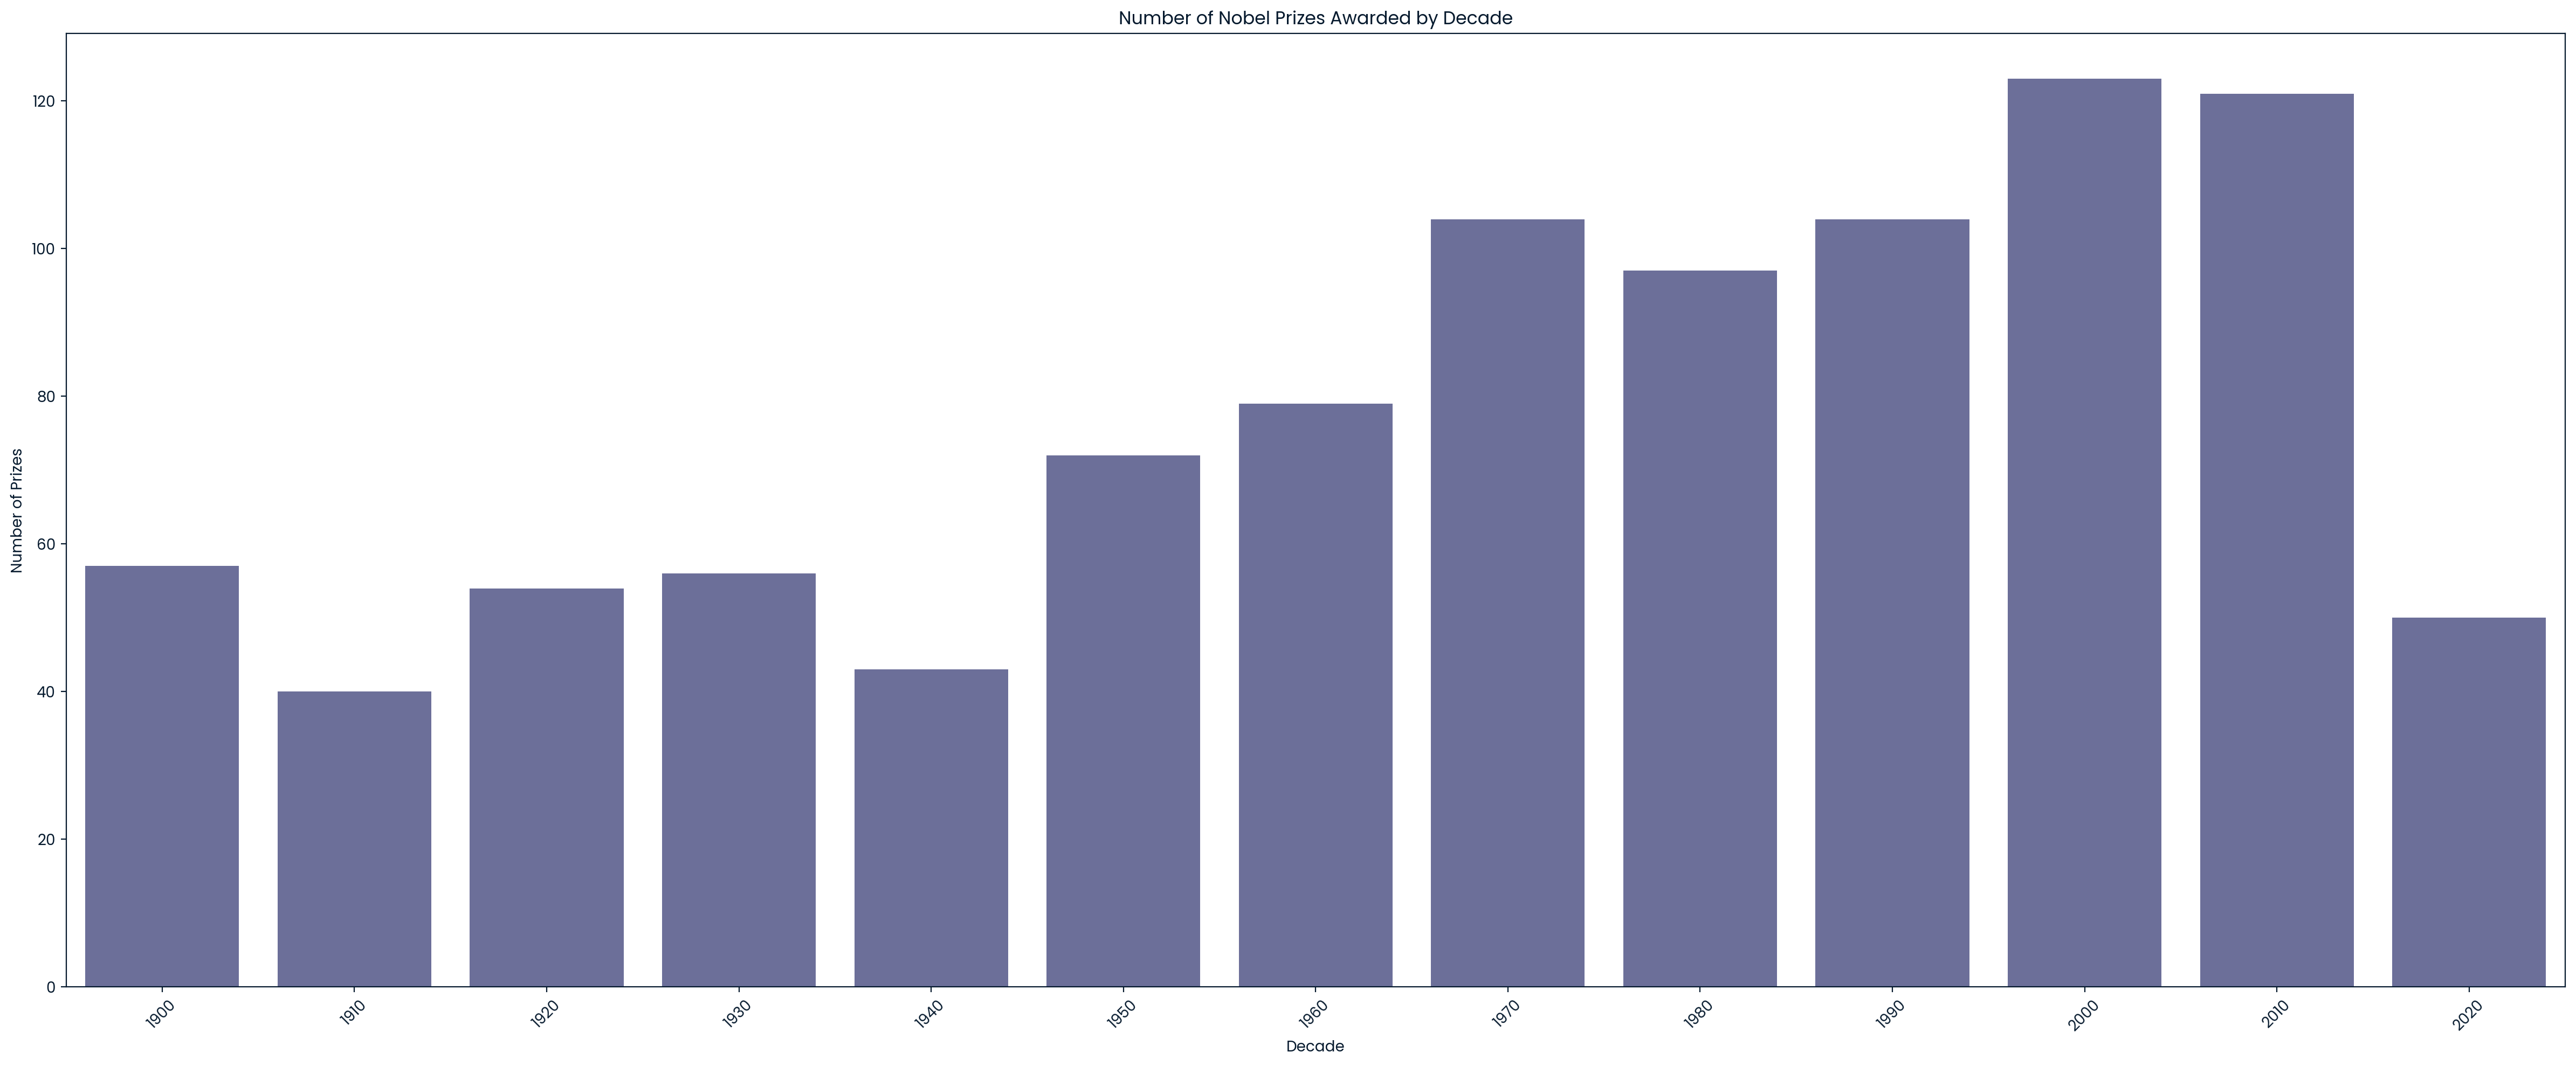

In [2]:
plt.figure(figsize=(24, 10))
sns.countplot(data=dp, x='decade', order=sorted(dp['decade'].unique()))
plt.title('Number of Nobel Prizes Awarded by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Prizes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Insight**: The number of Nobel Prizes awarded increased over time, reflecting global growth in science, literature, and peace efforts.

## Exploring gender distribution among Nobel Prize winners 🔍

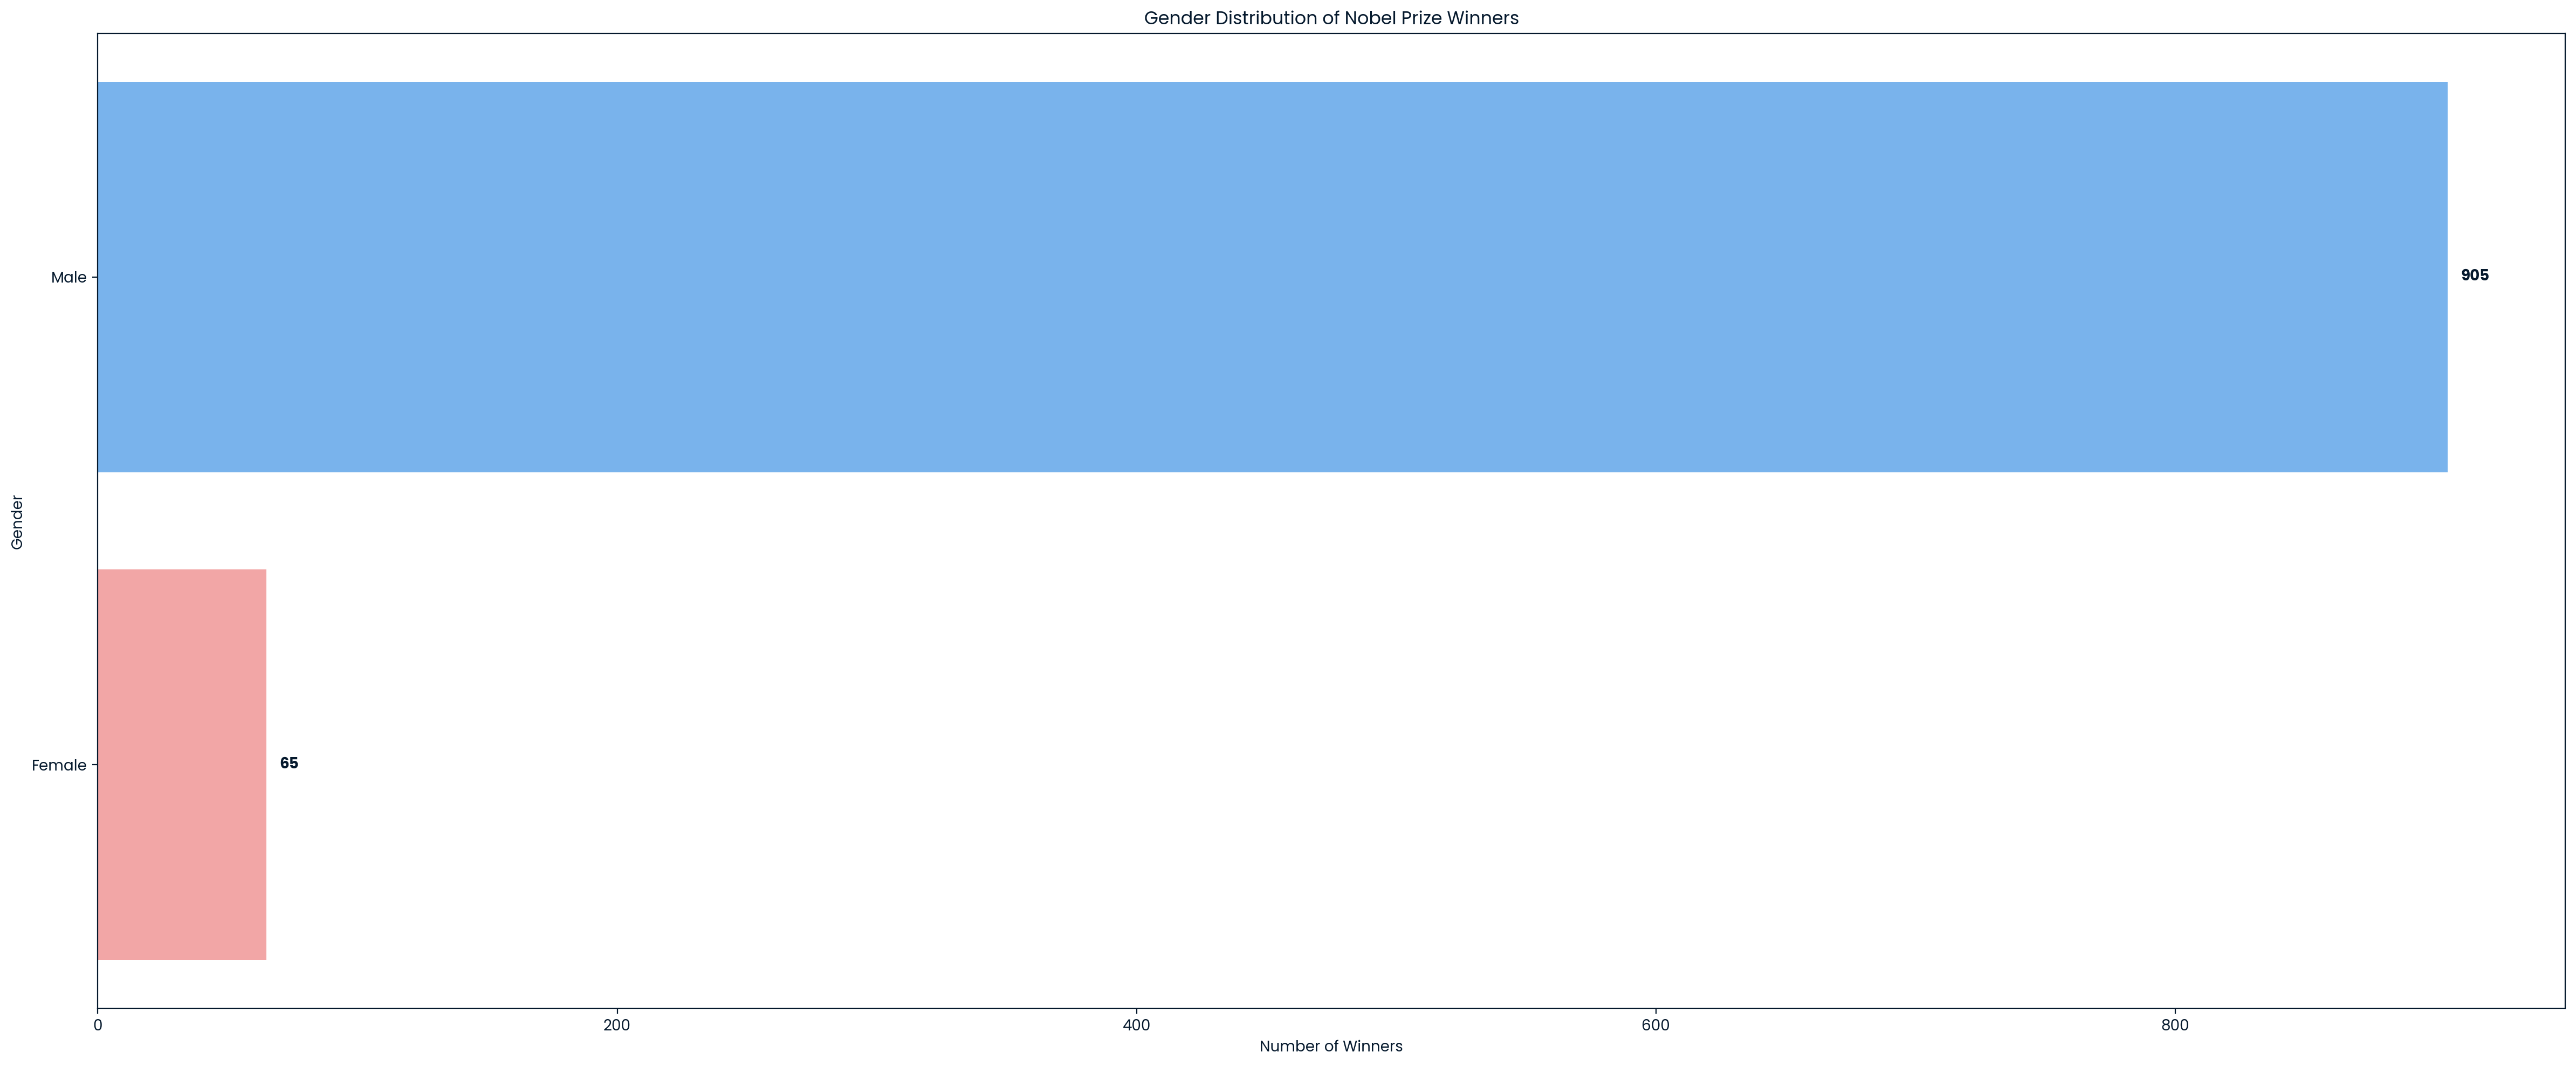

In [ ]:
gender_counts = dp["sex"].value_counts()

plt.figure(figsize=(24, 10))
sns.barplot(x=gender_counts.values, y=gender_counts.index, palette=["#66b3ff", "#ff9999"])
plt.title("Gender Distribution of Nobel Prize Winners")
plt.xlabel("Number of Winners")
plt.ylabel("Gender")

# numbers on bars
for i, value in enumerate(gender_counts.values):
    plt.text(value + 5, i, str(value), va='center', fontweight='bold')

plt.tight_layout()
plt.show()


### **Insight**: Males vastly outnumber females among Nobel Prize winners, but recent decades show encouraging trends toward inclusion.

## Top 10 birth countries of Nobel Prize winners 🔍 

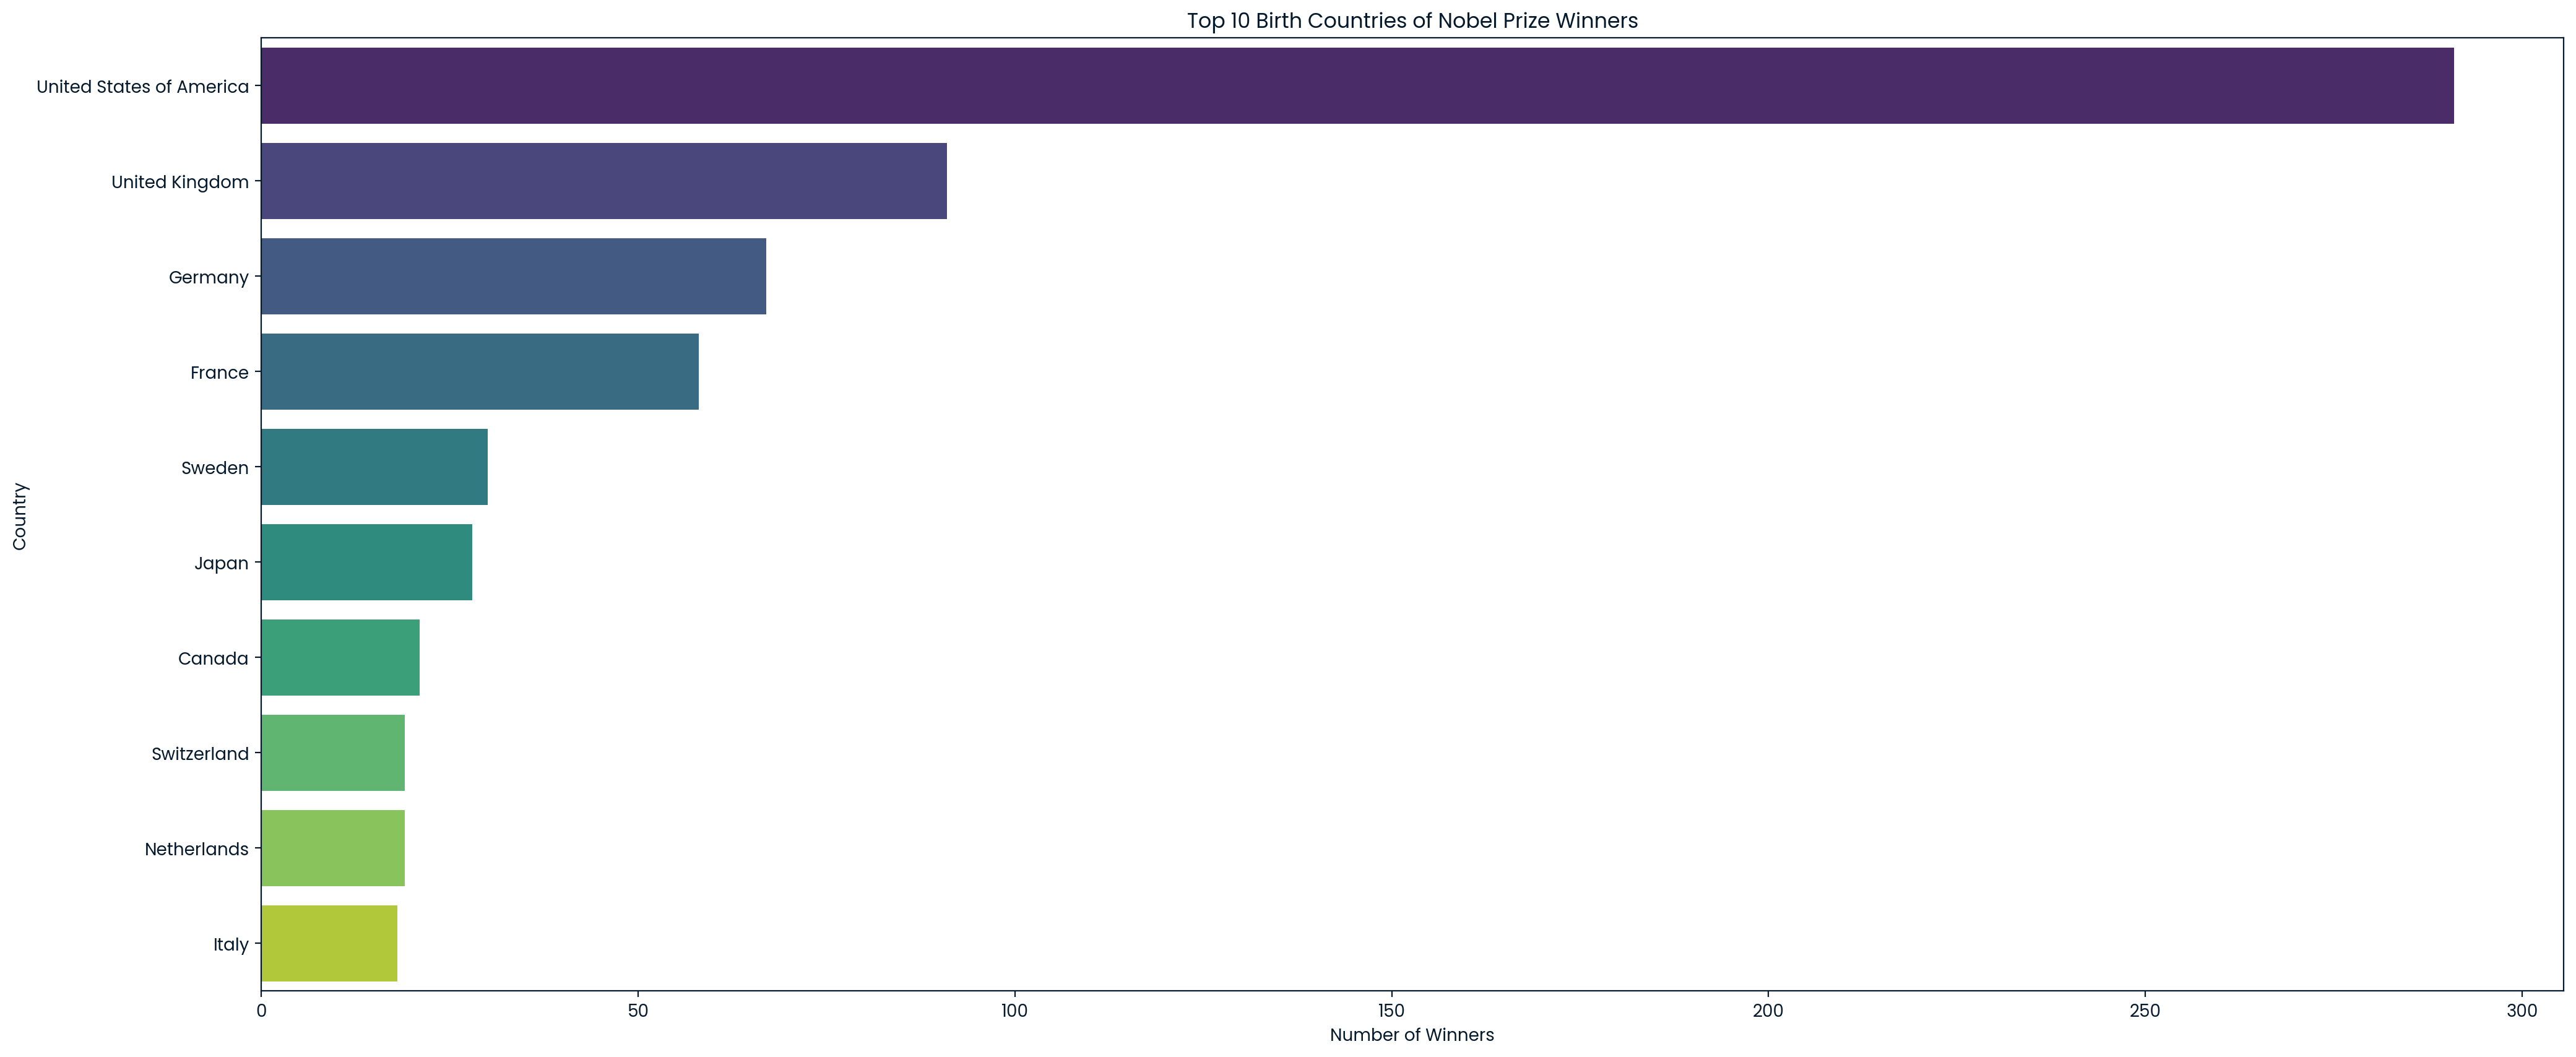

In [4]:
top_countries = dp['birth_country'].value_counts().head(10)
plt.figure(figsize=(24, 10))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title('Top 10 Birth Countries of Nobel Prize Winners')
plt.xlabel('Number of Winners')
plt.ylabel('Country')
plt.show()


### **Insight**: The USA leads by far, highlighting its academic and research dominance globally.

## Number of female Nobel Laureates by category 🔍 

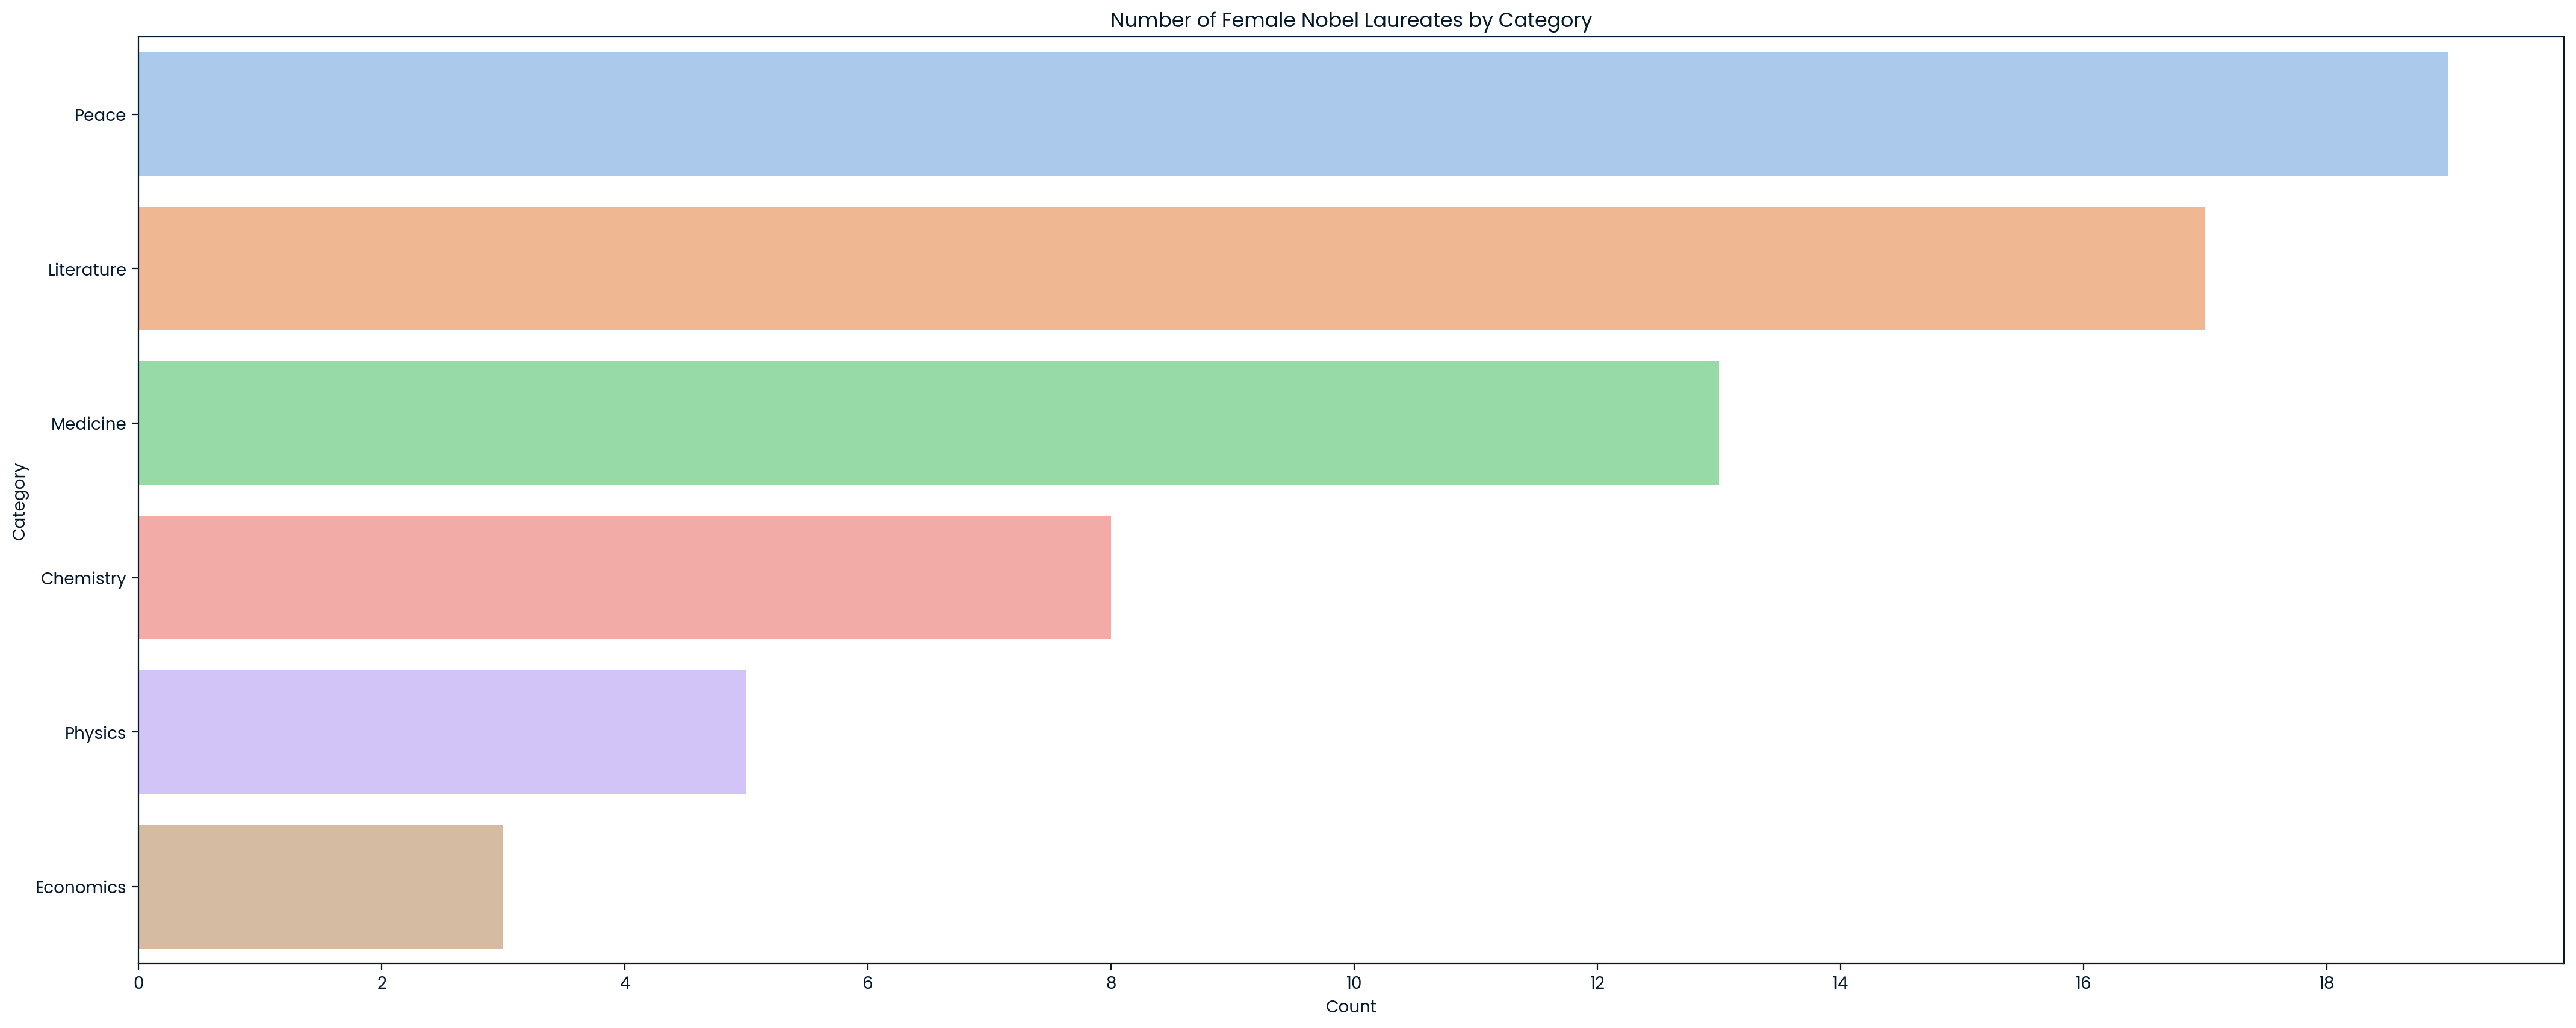

In [7]:
female_data = dp[dp["sex"] == "Female"]
plt.figure(figsize=(26, 10))
ax = sns.countplot(data=female_data, y='category', order=female_data['category'].value_counts().index, palette='pastel')
plt.title('Number of Female Nobel Laureates by Category')
plt.xlabel('Count')
plt.ylabel('Category')
# Force integer ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()


### **Insight**: Literature and Peace categories feature more female winners compared to Physics, Chemistry, or Medicine.

## Individuals who won more than one Nobel Prize 🔍 

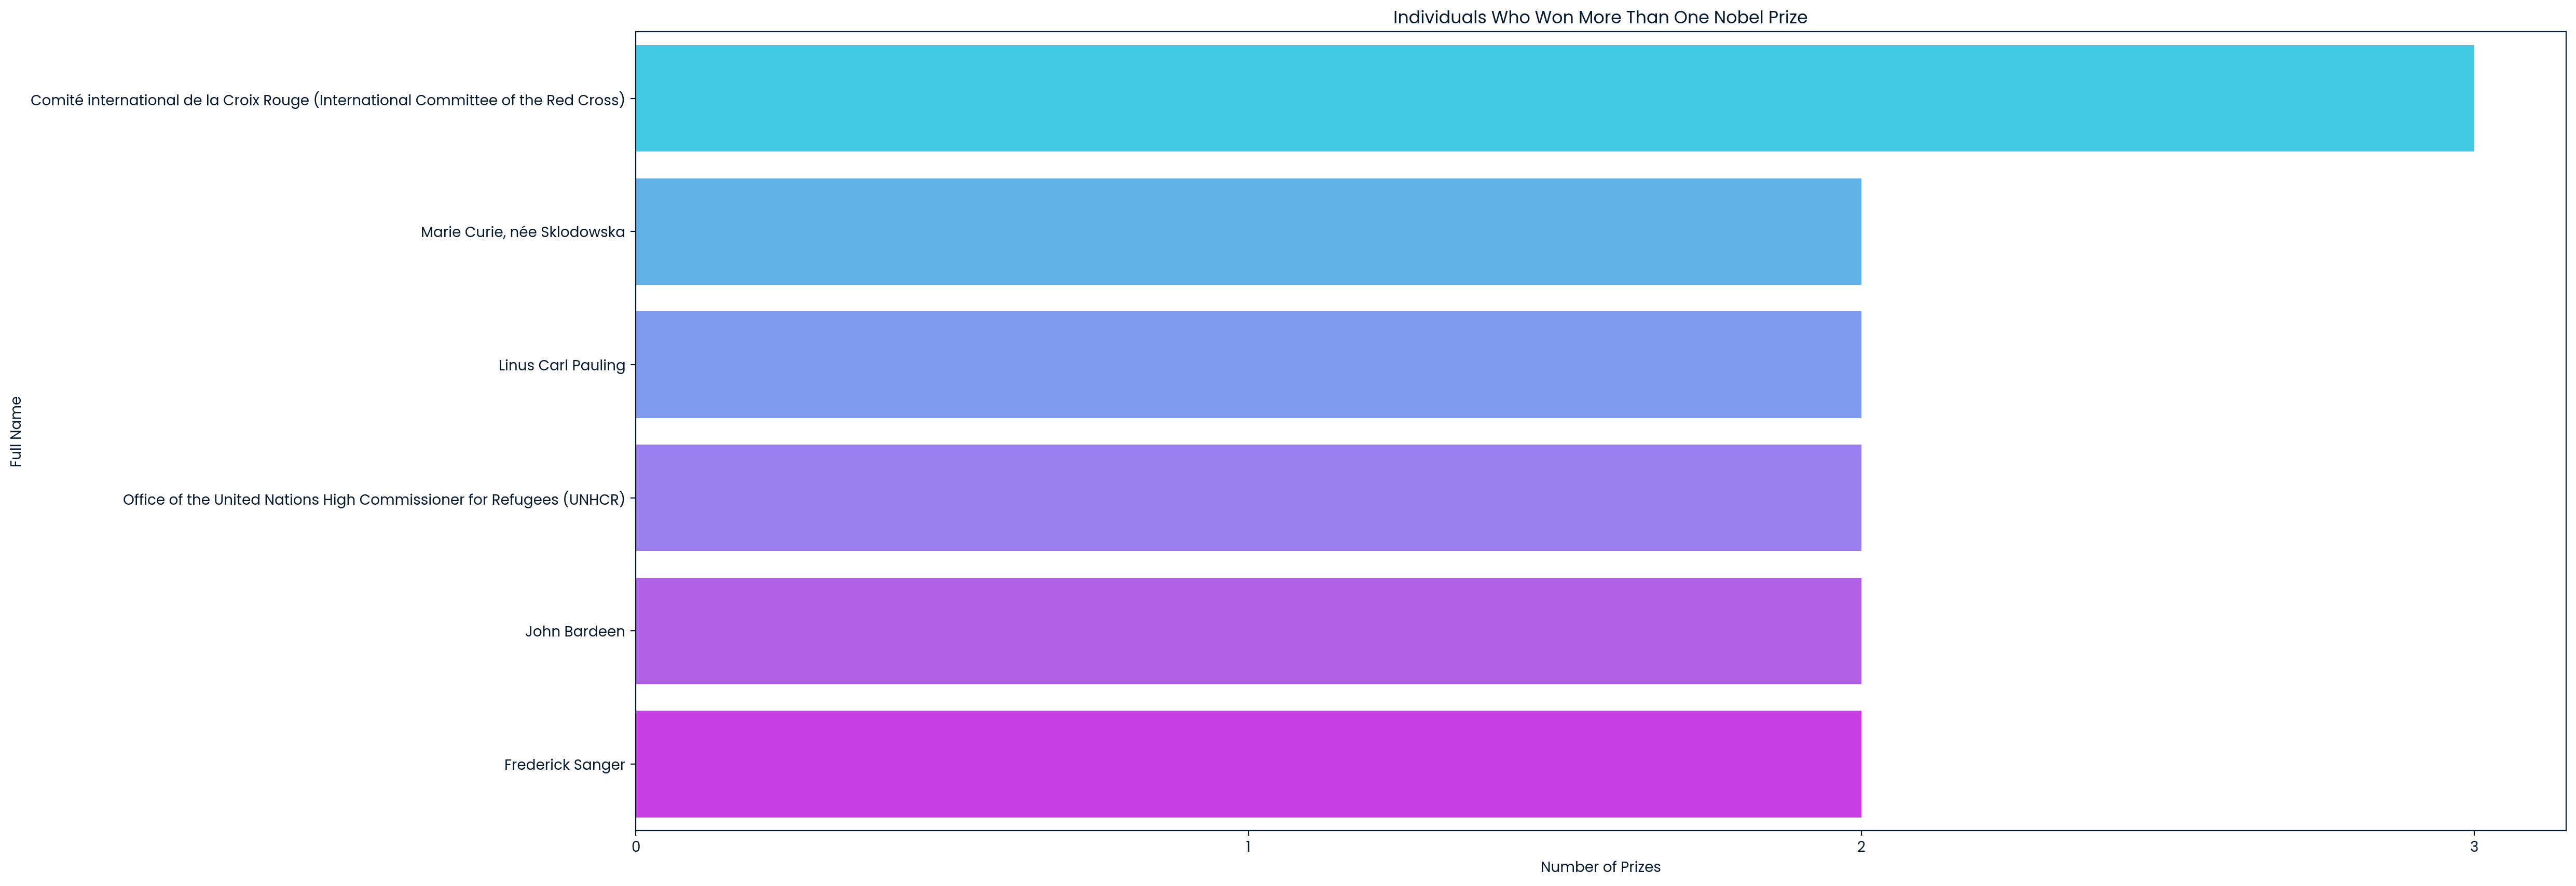

In [6]:
repeat_df = dp[dp['full_name'].isin(repeat_list)]
plt.figure(figsize=(24, 10))
ax = sns.countplot(data=repeat_df, y='full_name', order=repeat_df['full_name'].value_counts().index, palette='cool')
plt.title('Individuals Who Won More Than One Nobel Prize')
plt.xlabel('Number of Prizes')
plt.ylabel('Full Name')
# Fix x-axis tick marks to integers only
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

### Winning a Nobel Prize even once is a lifetime achievement.
### But a rare and elite group of individuals have managed to win multiple Nobel Prizes, demonstrating their extraordinary impact on humanity.

## Individuals Who Won the Nobel Prize More Than Once 🏆

### Marie Curie:

- 🥇 Nobel Prize in Physics (1903) — for her work on radioactivity.

- 🥇 Nobel Prize in Chemistry (1911) — for discovering radium and polonium.

- ➡️ Fun Fact: She remains the *only person to win Nobel Prizes in two different scientific fields.

### Linus Pauling:

- 🥇 Nobel Prize in Chemistry (1954) — for his research into the nature of chemical bonds.

- 🥇 Nobel Peace Prize (1962) — for his activism against nuclear weapons.

- ➡️ Fun Fact: He is the only person awarded two unshared Nobel Prizes (one in science, one in peace).

### John Bardeen:

- 🥇 Nobel Prize in Physics (1956) — for the invention of the transistor.

- 🥇 Nobel Prize in Physics (1972) — for the theory of superconductivity.

- ➡️ Fun Fact: He is the *only person to win the Nobel Prize in Physics twice.

### Frederick Sanger:

- 🥇 Nobel Prize in Chemistry (1958) — for work on the structure of proteins.

- 🥇 Nobel Prize in Chemistry (1980) — for contributions to the sequencing of DNA.

- ➡️ Fun Fact: He is one of the very few to win the Nobel Prize in the *same category twice.

### The International Committee of the Red Cross (organization):

- 🥇 Nobel Peace Prize three times (1917, 1944, and 1963) — for humanitarian efforts during wars and disasters.

### United Nations High Commissioner for Refugees (UNHCR) (organization):

- 🥇 Nobel Peace Prize twice (1954 and 1981) — for efforts to help refugees.

## Final Summary 📚:

In this project, we explored over a century of Nobel Prize history, diving deep into the patterns behind some of the world's most prestigious awards.

### Through our analysis, we discovered:

- The growing number of Nobel Prizes awarded over time, reflecting the expansion of knowledge and international cooperation.

- A historical gender gap, with a slow but encouraging rise in female laureates in recent decades.

- The United States' dominance as the birthplace of the majority of winners, alongside other academic powerhouses.

- Fields like Literature and Peace having greater female representation compared to scientific categories.

- The incredible achievements of individuals who won the Nobel Prize more than once, showcasing unparalleled excellence.